In [1]:
import pandas as pd
import numpy as np

In [2]:
from imblearn.datasets import fetch_datasets

dataset = fetch_datasets()

In [3]:
dataset.keys()

odict_keys(['ecoli', 'optical_digits', 'satimage', 'pen_digits', 'abalone', 'sick_euthyroid', 'spectrometer', 'car_eval_34', 'isolet', 'us_crime', 'yeast_ml8', 'scene', 'libras_move', 'thyroid_sick', 'coil_2000', 'arrhythmia', 'solar_flare_m0', 'oil', 'car_eval_4', 'wine_quality', 'letter_img', 'yeast_me2', 'webpage', 'ozone_level', 'mammography', 'protein_homo', 'abalone_19'])

In [4]:
X = dataset['ecoli']['data']
y = dataset['ecoli']['target']

In [5]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


Following code is from https://www.datacamp.com/community/tutorials/introduction-t-sne?utm_source=adwords_ppc&utm_campaignid=9942305733&utm_adgroupid=100189364546&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=229765585183&utm_targetid=dsa-929501846124&utm_loc_interest_ms=&utm_loc_physical_ms=1007850&gclid=EAIaIQobChMIkJrA7_LR6gIVB-ztCh113Q-ZEAAYASAAEgIVmvD_BwE

In [6]:
import time
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [7]:
# Utility function to visualize the outputs of PCA and t-SNE based on https://www.datacamp.com/community/tutorials/introduction-t-sne?utm_source=adwords_ppc&utm_campaignid=9942305733&utm_adgroupid=100189364546&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=229765585183&utm_targetid=dsa-929501846124&utm_loc_interest_ms=&utm_loc_physical_ms=1007850&gclid=EAIaIQobChMIkJrA7_LR6gIVB-ztCh113Q-ZEAAYASAAEgIVmvD_BwE

def plot_scatter(name, x, y):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(y))
    
    # if only one class set y to 0 to simplify indexing below as other wise would need to subtract 1
    if num_classes == 1:
        y = y * 0

    x = x.values

    # just adding two 
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')

    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[y.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    ax.set_title(name)

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[y == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [8]:


time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

PCA done! Time elapsed: 0.0333256721496582 seconds
Variance explained per principal component: [0.5161681  0.2442034  0.08419874 0.07413522]


In [9]:
def plot_pca(dataset_name, X, y):

    # get PCA for first four components
    pca = PCA(n_components=4)
    pca_result = pca.fit_transform(X)
    
    # use 0 and 1 for the class instead of -1 and 1
    y_abs = np.array([1 if yval>0 else 0 for yval in y])

    print('Variance explained per principal component: {}\n'.format(pca.explained_variance_ratio_))
    
    # plot the first two components:
    primary_components = pd.DataFrame(pca_result)[[0,1]]
    plot_scatter(dataset_name, primary_components, y_abs) 
    
    plt.plot()
    print

def plot_dataset(dataset_name, X, y, scale=True):
    if scale:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    plot_pca(dataset_name, X, y)
    
    
def investigate_dataset(dataset_name, dataset):
    
    print('Dataset: ', dataset_name)
    
    print('X summary: ', dataset_name)
    X = dataset[dataset_name]['data']
    X_df = pd.DataFrame(X)
    
    y = dataset[dataset_name]['target']
    y_df = pd.DataFrame(y)

    # give example of dataframe, and then describe it
    
    display(X_df.head())
    display(X_df.describe())
    
    print('y summary: ', dataset_name)
    display(y_df.head())
    display(y_df.describe())
    
    plot_dataset(dataset_name, X, y)
    
    
    

In [10]:
#for dataset_name in dataset.keys():
    #investigate_dataset(dataset_name, dataset)

In [11]:
#investigate_dataset('ecoli', dataset)

In [12]:
from src.lekayla.models.generative import CGAN
from src.lekayla.models.generative import VAE
from src.lekayla.models.generative import SMOTE
from src.lekayla.data import DatasetGenerator


from sklearn.model_selection import train_test_split

def generate_samples(dataset_name, dataset=None, n_samples=64):
    
    # using multi line document string as a hack multiline comment
    """
    X = pd.DataFrame(dataset[dataset_name]['data'])
    y = pd.DataFrame(dataset[dataset_name]['target'])
    
    # use 0 and 1 for the class instead of -1 and 1
    y_abs = np.array([0 if yval < 0 else yval for yval in y[0]])

    X_train, X_test, y_train, y_test = train_test_split(X.values, y_abs, test_size=0.33, stratify=y_abs, random_state=168)
    
    scaler = StandardScaler() # RobustScaler() 
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    
    cgan = CGAN(latent_dim=100)
    cgan.fit(scaled_X_train, y_train, n_epochs=1000, batch_size=64)
    # assuming the class is 1 for minority class
    cgan_samples = cgan.generate_samples(1, n_samples=n_samples)
    
    # for VAE just using the minority data only to create the samples
    vae = VAE()
    #X_train_minority = X_train[:][np.where(y_train==1)]
    #y_train_minority = y_train[np.where(y_train==1)]
    
    vae.fit(scaled_X_train, y_train)
    vae_samples = vae.generate_samples(n_samples=n_samples)
    
    smote = SMOTE()
    smote.fit(scaled_X_train, y_train)
    smote_samples = smote.generate_samples(n_samples=n_samples)
    
    """
    datagen = DatasetGenerator()
    scale = 2
    cgan_samples,_,_,_ = datagen.generate(dataset_name, scale, False, sampler=CGAN(latent_dim=100))
    vae_samples,_,_,_ = datagen.generate(dataset_name, scale, False, sampler=VAE())
    smote_samples,_,_,_ = datagen.generate(dataset_name, scale, False, sampler=SMOTE())
    
    return (cgan_samples, vae_samples, smote_samples)
    

Using TensorFlow backend.


In [13]:
#cgan_samples, vae_samples, smote_samples = generate_samples('ecoli', n_samples=336)

In [14]:
#investigate_dataset('ecoli', dataset)

    
def describe_samples(dataset_name, dataset, cgan_samples, vae_samples, smote_samples):
    
    print('Dataset: ', dataset_name)
    
    print('X summary: ', dataset_name)
    X = dataset[dataset_name]['data']
    X_df = pd.DataFrame(X)
    y = dataset[dataset_name]['target']
    y_df = pd.DataFrame(y)
    
    # give example of dataframe, and then describe it
    
    display(X_df.head())
    display(X_df.describe())
    
    print('y summary: ', dataset_name)
    display(y_df.head())
    display(y_df.describe())
    
    classes = set(y)
    num_minority = y[y==max(classes)].shape[0]
    num_majority = y[y==min(classes)].shape[0]
    print("Number Minority Samples: ", num_minority)
    print("Number Majority Samples: ", num_majority)
    print("Ratio: ", num_minority/num_majority)
    
    c = pd.DataFrame(cgan_samples)
    display(c.head())
    display(c.describe())
    
    
    v = pd.DataFrame(vae_samples)
    display(v.head())
    display(v.describe())
    
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X)
    
    #cgan_samples, vae_samples = generate_samples(dataset_name,dataset)
    
    X = np.vstack((scaled_X, cgan_samples))
    
    print(X.shape)
    print(y.shape)
    
    y_twos = np.ones((cgan_samples.shape[0], 1)) * 2
    y = np.vstack((y_df, y_twos))

    print(X.shape)
    print(y.shape)
    
    X = np.vstack((X, vae_samples))
    
    y_threes = np.ones((vae_samples.shape[0], 1)) * 3
    y = np.vstack((y, y_threes))
    
    print(X.shape)
    print(y.shape)
    
    X = np.vstack((X, smote_samples))
    
    y_fours = np.ones((smote_samples.shape[0], 1)) * 4
    y = np.vstack((y, y_fours))

    print(X.shape)
    print(y.shape)
    plot_pca(dataset_name, X, y)


In [15]:
#describe_samples('ecoli', dataset, cgan_samples, vae_samples, smote_samples)

Number of samples to be generated 23
Epoch 1/30
23/23 [==============================] - 1s 39ms/step - loss: 12.3423 - rec_loss: 10.5902 - kl_loss: 1.7521
Epoch 2/30
23/23 [==============================] - 0s 1ms/step - loss: 12.0556 - rec_loss: 10.3225 - kl_loss: 1.7331
Epoch 3/30
23/23 [==============================] - 0s 2ms/step - loss: 12.8214 - rec_loss: 11.1134 - kl_loss: 1.7079
Epoch 4/30
23/23 [==============================] - 0s 808us/step - loss: 13.5257 - rec_loss: 11.8403 - kl_loss: 1.6854
Epoch 5/30
23/23 [==============================] - 0s 2ms/step - loss: 12.4407 - rec_loss: 10.7790 - kl_loss: 1.6617
Epoch 6/30
23/23 [==============================] - 0s 663us/step - loss: 12.6469 - rec_loss: 11.0092 - kl_loss: 1.6378
Epoch 7/30
23/23 [==============================] - 0s 946us/step - loss: 12.0964 - rec_loss: 10.4819 - kl_loss: 1.6144
Epoch 8/30
23/23 [==============================] - 0s 548us/step - loss: 12.3480 - rec_loss: 10.7568 - kl_loss: 1.5913
Epoch 9/30

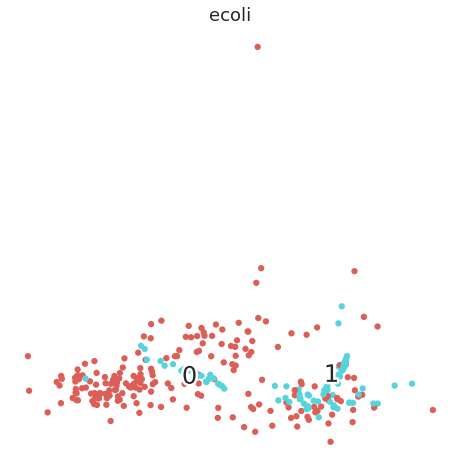

In [24]:
from src.lekayla.data import DatasetGenerator
datagen = DatasetGenerator()
scale = 2
X_e_train, X_e_test, y_e_train, y_e_test = datagen.get_original_with_CGAN_and_VAE_and_SMOTE('ecoli', scale=2)
plot_pca('ecoli', X_e_train, y_e_train)


In [23]:
sum(y_e_train)

92.0

In [18]:
sum([1 if y > 0 else 0 for y in dataset['ecoli']['target']])

35

Dataset:  ecoli
X summary:  ecoli


,0,1,2,3,4,5,6
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35


,0,1,2,3,4,5,6
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


y summary:  ecoli


,0
0,-1
1,-1
2,-1
3,-1
4,-1


,0
count,336.000000
mean,-0.791667
std,0.611864
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


Variance explained per principal component: [0.31508933 0.20874152 0.17164325 0.1224513 ]



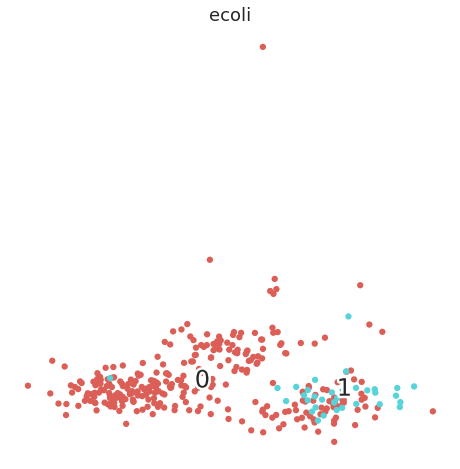

In [19]:
investigate_dataset('ecoli', dataset)
    